<a href="https://colab.research.google.com/github/Evgen-Shah/YOLOV5_WORKS/blob/main/YoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Для поиска заданных объектов будем использовать нейронную сеть YoloV5

**В** YOLO v5 функция активации Leaky ReLU используется в средних/скрытых слоях, а сигмовидная функция активации используется в последнем слое обнаружения.

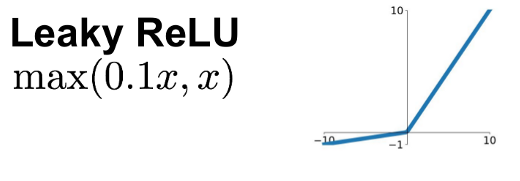

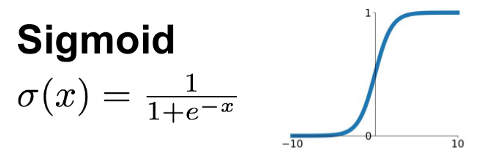

213 слоев использутся


Для обучения нейронной сети нам необходимо создать параметры обучения для каждого обучающего изображения


Подключим библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from PIL import Image
import numpy as np
import requests

Mounted at /content/drive


# Скачаем YoloV5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-69-g7830e91 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/107.7 GB disk)


#Загрузим данные для обучения

In [ ]:
!unzip -q ../train_data1.zip -d ../


# Тестовые изображения в нейронной сети

In [ ]:
path="/content/drive/MyDrive/content/yolov5/runs/train/exp2"
ai = Image.open(path+'/train_batch2.jpg')
display(ai)
ai = Image.open(path+'/train_batch1.jpg')
display(ai)
ai = Image.open(path+'/train_batch0.jpg')
display(ai)

# Обучим нейронную сеть 

—img — размер изображения, подаваемого на вход yolo. Это значит, что размер исходного изображения преобразуется к виду n x n, где n — число, введенное пользователем после ключа —img. ВАЖНО: n должно быть кратно 32 (это связано с архитектурой yolo)

—batch — размер батча, то есть количество картинок, одновременно подаваемых на вход yolo

—epoch — количество эпох для обучения

—data — путь до .yaml файлика

—weights — путь до файла весов (нужны предобученные веса, чтобы не обучаться с нуля)

—name — куда сохраняем результаты обучения

—workers — количество потоков, на которых запускаем обучение (нужно для увеличения скорости обучения).


In [ ]:
!python /content/drive/MyDrive/content/yolov5/train.py --img 640 --batch 16 --epochs 70 --data /content/drive/MyDrive/content/yolov5/data/custom_date.yaml --weights /content/drive/MyDrive/content/yolov5/yolov5s.pt --cache

train: weights=/content/drive/MyDrive/content/yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/content/yolov5/data/custom_date.yaml, hyp=drive/MyDrive/content/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/content/yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-69-g7830e91 torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_p

# Задетектим изображения


In [ ]:
!python /content/drive/MyDrive/content/yolov5/detect.py --weights /content/drive/MyDrive/content/yolov5/runs/train/exp2/weights/last.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/content/yolov5/data/images


detect: weights=['/content/drive/MyDrive/content/yolov5/runs/train/exp2/weights/last.pt'], source=/content/drive/MyDrive/content/yolov5/data/images, data=drive/MyDrive/content/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/content/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-69-g7830e91 torch 1.10.0+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/7 /content/drive/MyDrive/content/yolov5/data/images/2.jpg: 448x640 76 windowss, Done. (0.323s)
image 2/7 /content/drive/MyDrive/content/yolov5/data/images/3.jpg: 512x640 Done. (0.333s)
image 3/7 /content/drive/MyDrive/content/yolov5/data/images/4.jpg: 448x640 22 windowss, Done.

In [ ]:
path="/content/drive/MyDrive/content/yolov5/runs/detect/exp19"
ai = Image.open(path+'/2.jpg')
print('30 windows - 42 всего')
print(str(30/42 * 100) + "%")
display(ai)
ai = Image.open(path+'/3.jpg')
print('0 windows - 32 всего')
print(str(0/32 * 100) + "%")
display(ai)
ai = Image.open(path+'/4.jpg')
print('9 windows - 15 всего')
print(str(9/15* 100) + "%")
display(ai)
ai = Image.open(path+'/5.jpg')
print('59 windows - 117 всего')
print(str(59/117* 100) + "%")
display(ai)
ai = Image.open(path+'/6.jpg')
print('7 windows - 16 всего')
print(str(7/16* 100)+ "%")
display(ai)
ai = Image.open(path+'/7.jpg')
print('8 windows - 10 всего')
print(str(8/10* 100) + "%")
display(ai)
ai = Image.open(path+'/8.jpg')
print('24 windows - 25 всего ')
print(str(24/25* 100) + "%")
display(ai)

In [ ]:
path="/content/drive/MyDrive/content/yolov5/runs/detect/exp20"
ai = Image.open(path+'/2.jpg')
print('71 windows - 42 всего')
print(str(71/42 * 100) + "%")
display(ai)
ai = Image.open(path+'/3.jpg')
print('4 windows - 32 всего')
print(str(4/32 * 100) + "%")
display(ai)
ai = Image.open(path+'/4.jpg')
print('13 windows - 15 всего')
print(str(13/15 * 100) + "%")
display(ai)
ai = Image.open(path+'/5.jpg')
print('163 windows - 117 всего')
print(str(163/117 * 100) + "%")
display(ai)
ai = Image.open(path+'/6.jpg')
print('36 windows - 16 всего')
print(str(36/16 * 100) + "%")
display(ai)
ai = Image.open(path+'/7.jpg')
print('13 windows - 10 всего')
print(str(13/10 * 100) + "%")
display(ai)
ai = Image.open(path+'/8.jpg')
print('21 windows - 25 всего')
print(str(21/25 * 100) + "%")
display(ai)

In [ ]:
path="/content/drive/MyDrive/content/yolov5/runs/detect/exp21"
ai = Image.open(path+'/2.jpg')
print('76 windows - 42 всего')
print(str(76/42 * 100) + "%")
display(ai)
ai = Image.open(path+'/3.jpg')
print('0 windows - 32 всего')
print(str(0/32 * 100) + "%")
display(ai)
ai = Image.open(path+'/4.jpg')
print('22 windows - 15 всего')
print(str(22/15 * 100) + "%")
display(ai)
ai = Image.open(path+'/5.jpg')
print('166 windows - 117 всего')
print(str(166/117 * 100) + "%")
display(ai)
ai = Image.open(path+'/6.jpg')
print('21 windows - 16 всего')
print(str(21/16 * 100) + "%")
display(ai)
ai = Image.open(path+'/7.jpg')
print('26 windows - 10 всего')
print(str(26/10 * 100) + "%")
display(ai)
ai = Image.open(path+'/8.jpg')
print('31 windows - 25 всего')
print(str(31/25 * 100) + "%")
display(ai)

# Вывод
Обученная нейронная сеть показывает хороший результат на большинстве тестовых изображений(от 50 до 90 процентов)

Обучение проводилось на 16 изображениях в среднем с 20+- окнами на каждом

Окна "вырезались" и преобразовывались в Yolo формате на сайте https://www.makesense.ai/

Наиболее точные результаты получались при 70 эпохах обучения нейронной сети 
